<a href="https://colab.research.google.com/github/bkvkrll/Introduction-to-Neural-Networks/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическое задание
Используем набор примеров fashion-MNIST

Опишите - какой результата получен в нейросети в зависимости от:

числа нейронов в слое(для 2-хслойной сети),
числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
фиксируйте для тренировочного и тестового набора метрики accuracy.
Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [26]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import numpy as np
import mnist

#import tf.kears as keras
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы

from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# import tensorflow as tf

import matplotlib.pyplot as plt

In [29]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

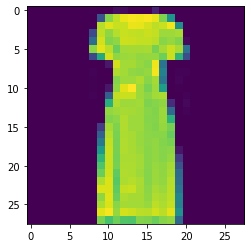

In [30]:
plt.imshow(train_images[50,:,:])
plt.show()

In [31]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [32]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

**2 слоя, 20 нейронов**

In [33]:
model = Sequential([
  Dense(20, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5466 - accuracy: 0.8089 - auc: 0.9828
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4154 - accuracy: 0.8513 - auc: 0.9889
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3853 - accuracy: 0.8608 - auc: 0.9901
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3670 - accuracy: 0.8670 - auc: 0.9909
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3547 - accuracy: 0.8719 - auc: 0.9914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3441 - accuracy: 0.8759 - auc: 0.9918
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8789 - auc: 0.9922
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3278 - accuracy: 0.8826 - auc: 0.9925
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - lo

In [34]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

model.save_weights('model.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8585 - auc: 0.9893


2 слоя, 64 нейрона

In [35]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4998 - accuracy: 0.8209 - auc: 0.9848
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3890 - accuracy: 0.8581 - auc: 0.9902
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3536 - accuracy: 0.8700 - auc: 0.9917
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3287 - accuracy: 0.8802 - auc: 0.9927
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8847 - auc: 0.9933
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8907 - auc: 0.9939
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.8947 - auc: 0.9944
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.8984 - auc: 0.9947
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - lo

In [36]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

model.save_weights('model.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8683 - auc: 0.9908


2 слоя, 256 нейронов

In [37]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4755 - accuracy: 0.8284 - auc: 0.9858
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3689 - accuracy: 0.8659 - auc: 0.9910
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3291 - accuracy: 0.8778 - auc: 0.9927
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.8888 - auc: 0.9936
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2885 - accuracy: 0.8936 - auc: 0.9942
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2707 - accuracy: 0.9002 - auc: 0.9949
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2575 - accuracy: 0.9043 - auc: 0.9950
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2429 - accuracy: 0.9089 - auc: 0.9957
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - lo

In [38]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

model.save_weights('model.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8826 - auc: 0.9905


Вывод; с увеличение количества нейронов растут метрики

Попробуем большее количество слоев

In [39]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)), 
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5001 - accuracy: 0.8165 - auc: 0.9848
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3790 - accuracy: 0.8596 - auc: 0.9907
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3411 - accuracy: 0.8755 - auc: 0.9922
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3136 - accuracy: 0.8845 - auc: 0.9932
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3000 - accuracy: 0.8893 - auc: 0.9937
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2807 - accuracy: 0.8962 - auc: 0.9944
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2659 - accuracy: 0.9019 - auc: 0.9949
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9056 - auc: 0.9953
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - lo

In [40]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

model.save_weights('model.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8791 - auc: 0.9909


In [41]:
y_predi = model(test_images[:,:])
np.argmax(y_predi, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [42]:
yy = np.argmax(y_predi, axis=1)
np.where(test_labels != yy)[0]

array([  17,   23,   25, ..., 9977, 9979, 9985])

In [43]:
cm = confusion_matrix(test_labels,yy)
print(cm)

[[854   5  14  17   2   1  97   1   9   0]
 [  0 978   0  17   2   0   1   0   2   0]
 [ 16   1 777  18 120   0  66   0   2   0]
 [ 28  24  10 875  36   0  23   0   4   0]
 [  0   5  57  32 848   0  54   0   4   0]
 [  1   0   0   2   0 924   0  55   2  16]
 [127   2  70  25  82   0 682   0  12   0]
 [  0   0   0   0   0   5   0 989   0   6]
 [  4   0   1   6   1   2   8   6 972   0]
 [  1   0   0   1   0   6   0 100   0 892]]


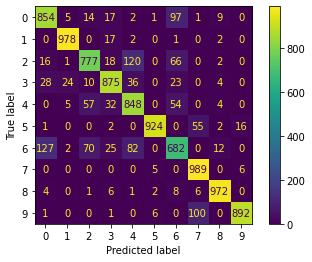

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

Вывод: метрики модели с большим числом слоев оказались ниже на трейне, но выше на тесте, чем при 2-х слойной модели

**Теперь сравним с разными оптимизаторами**

In [45]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='SGD',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6844 - accuracy: 0.7713 - auc: 0.9765
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4874 - accuracy: 0.8295 - auc: 0.9862
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4472 - accuracy: 0.8437 - auc: 0.9880
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4240 - accuracy: 0.8509 - auc: 0.9889
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4070 - accuracy: 0.8569 - auc: 0.9897
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3930 - accuracy: 0.8607 - auc: 0.9902
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3814 - accuracy: 0.8654 - auc: 0.9907
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3717 - accuracy: 0.8693 - auc: 0.9911
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - lo

In [46]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='RMSProp',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4909 - accuracy: 0.8202 - auc: 0.9850
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3752 - accuracy: 0.8646 - auc: 0.9900
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3415 - accuracy: 0.8773 - auc: 0.9914
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3240 - accuracy: 0.8833 - auc: 0.9919
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3081 - accuracy: 0.8905 - auc: 0.9925
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2948 - accuracy: 0.8963 - auc: 0.9930
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2844 - accuracy: 0.8991 - auc: 0.9931
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2750 - accuracy: 0.9051 - auc: 0.9935
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - lo

При прочих равных данных метрики лучше получились при применении оптимизатора Adam